## Unit 1 - The Wave Function

<a href="https://colab.research.google.com/github/uqglmn/qm/blob/main/Problem_14.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Problem 1.4

At time $t = 0$ a particle is represented by the wave function
$$
\Psi(x,0) = \begin{cases} 
A\,x/a & 0 \le x \le a \\
A\,(b-x)/(b-a) & a \le x \le b \\
0 & \text{otherwise} \\
\end{cases}
$$
where $A$, $a$, and $b$ are positive real constants.

(a) Normalize $\Psi$ (that is, find $A$, in terms of $a$ and $b$).

(b) Sketch $\Psi(x,0)$, as a function of $x$.

(c) Where is the particle most likely to be found, at $t = 0$?

(d) What is the probability of finding the particle to the left of $a$? Check your result in
the limiting cases $b = a$ and $b = 2a$.

(e) What is the expectation value of $x$?

### Solution

#### Load SymPy and variables

In [1]:
import sympy as sym

In [2]:
a, b, A = sym.symbols("a b A", positive=True, real=True)
x = sym.symbols("x", real=True)

#### Solution to (a)

We must have
$$
\int_{-\infty}^{+\infty}|\Psi(x,0)|^2 dx = \int_{0}^{a}|A\,x/a|^2 dx + \int_{a}^{b}|A\,(b-x)/(b-a)|^2 dx = 1
$$
The first integral is:

In [3]:
int1 = sym.integrate((A*x/a)**2, (x,0,a))
int1

A**2*a/3

The second integral is:

In [4]:
int2 = sym.simplify(sym.integrate((A*(b-x)/(b-a))**2, (x,a,b)))
int2

A**2*(-a + b)/3

This gives
$$
\frac{A^2a}{3} + \frac{A^2(b-a)}{3} = 1 
\quad \Longrightarrow\quad A^2 = \frac{3}{b} 
\quad \Longrightarrow\quad A = \sqrt{\frac{3}{b}}
$$
Let's repeat this with SymPy:

In [5]:
sym.solve(int1 + int2 - 1, A)

[sqrt(3)/sqrt(b)]

Answer: $A = \sqrt{3/b}$ since $A$ must be a positive real constant.

#### Solution to (b)


Choose $a=1$ and $b=3$. Then:

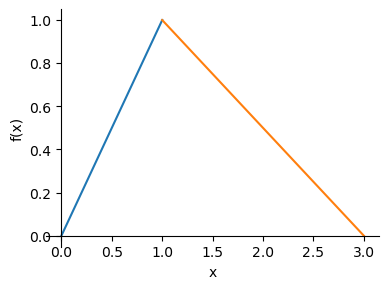

In [6]:
na, nb = 1, 3
p1 = sym.plotting.plot(3/nb*x/na, (x,0,na), show=False, size=(4,3))
p2 = sym.plotting.plot(3/nb*(nb-x)/(nb-na), (x,na,nb), show=False)
p1.extend(p2)
p1.show()

#### Solution to (c)


The $\Psi(x,0)$ has a maximum at $x=a$, thus it is most likely to observe the particle at $x=a$.

#### Solution to (d)


The probability of observing the particle to the left of $a$ is:
$$
P_{x\le a} = \int_{0}^{a}|A\,x/a|^2 dx = \frac{A^2a}{3} = \frac{a}{b}
$$

When $b=a$ the probability is $1$. When $b=2a$ the probability is $1/2$.

#### Solution to (e)


The expectation value of $x$ is:
$$
\langle x \rangle = \int_{-\infty}^{+\infty} \Psi^\dagger(x,0) \,x\, \Psi(x,0)\, dx = A^2\int_{0}^{a}x\,(x/a)^2 dx + A^2\int_{a}^{b}x\,((b-x)/(b-a))^2 dx 
$$
where $A^2 = 3/b$. 

The first integral is:

In [7]:
int1 = 3/b*sym.integrate(x*(x/a)**2, (x,0,a))
int1

3*a**2/(4*b)

The second integral is:

In [8]:
int2 = sym.simplify( 3/b*sym.simplify(sym.integrate(x*((b-x)/(b-a))**2, (x,a,b))) )
int2

-3*a**2/(4*b) + a/2 + b/4

Thus the expectation value $\langle x \rangle$ is:

In [9]:
sym.simplify(int1+int2)

a/2 + b/4

---